In [3]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [3]:
ser_obj = Series(np.arange(8), index = ['row 1','row 2', 'row 3', 'row 4','row 5', 'row 6', 'row 7', 'row 8'])

In [13]:
ser_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [14]:
ser_obj[[0, 7]]

row 1    0
row 8    7
dtype: int32

In [16]:
np.random.seed(26)

df_obj = DataFrame(np.random.rand(36).reshape(6, 6), 
                   index = ['row 1','row 2', 'row 3', 'row 4','row 5', 'row 6'],
                  columns = ['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6']) 

In [17]:
df_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
row 2,0.269505,0.496192,0.739122,0.194952,0.179745,0.538826
row 3,0.282766,0.760940,0.269693,0.293520,0.962406,0.913214
row 4,0.568175,0.485492,0.653704,0.536629,0.995739,0.141982
row 5,0.975342,0.619557,0.720486,0.295064,0.600132,0.750635
row 6,0.641366,0.923299,0.888730,0.644671,0.295642,0.682594


In [18]:
df_obj.loc[['row 2', 'row 5'], ['column 5', 'column 2']]

,column 5,column 2
row 2,0.179745,0.496192
row 5,0.600132,0.619557


### Data Slicing

In [19]:
ser_obj[3:7]

row 4    3
row 5    4
row 6    5
row 7    6
dtype: int32

In [22]:
df_obj < 0.7 # rather than masking the data frame, this logical expression works

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,True,True,False,False,False,True
row 2,True,True,False,True,True,True
row 3,True,False,True,True,False,False
row 4,True,True,True,True,False,True
row 5,False,True,False,True,True,False
row 6,True,False,False,True,True,True


In [24]:
df_obj[df_obj > 0.7] 

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,NaN,NaN,0.768298,0.789221,0.870562,NaN
row 2,NaN,NaN,0.739122,NaN,NaN,NaN
row 3,NaN,0.760940,NaN,NaN,0.962406,0.913214
row 4,NaN,NaN,NaN,NaN,0.995739,NaN
row 5,0.975342,NaN,0.720486,NaN,NaN,0.750635
row 6,NaN,0.923299,0.888730,NaN,NaN,NaN


In [25]:
ser_obj[ser_obj > 5]

row 7    6
row 8    7
dtype: int32

In [26]:
missing = np.nan
ser_obj1 = Series(['row 1','row 2', missing, 'row 4','row 5', 'row 6', missing, 'row 8'])

In [28]:
ser_obj1

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [30]:
# np.random.seed(xx), np.random.rand(), returns random numbers range between 0 to 1 in xx shape
np.random.seed(26)
df_obj = DataFrame(np.random.rand(36).reshape(6,6))

In [31]:
df_obj

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
1,0.269505,0.496192,0.739122,0.194952,0.179745,0.538826
2,0.282766,0.760940,0.269693,0.293520,0.962406,0.913214
3,0.568175,0.485492,0.653704,0.536629,0.995739,0.141982
4,0.975342,0.619557,0.720486,0.295064,0.600132,0.750635
5,0.641366,0.923299,0.888730,0.644671,0.295642,0.682594


In [32]:
df_obj.loc[3:5, 0] = missing
df_obj.loc[1:4, 5] = missing
df_obj

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
1,0.269505,0.496192,0.739122,0.194952,0.179745,NaN
2,0.282766,0.760940,0.269693,0.293520,0.962406,NaN
3,NaN,0.485492,0.653704,0.536629,0.995739,NaN
4,NaN,0.619557,0.720486,0.295064,0.600132,NaN
5,NaN,0.923299,0.888730,0.644671,0.295642,0.682594


In [40]:
filled_df = df_obj.fillna(0)
filled_df

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
1,0.269505,0.496192,0.739122,0.194952,0.179745,0.000000
2,0.282766,0.760940,0.269693,0.293520,0.962406,0.000000
3,0.000000,0.485492,0.653704,0.536629,0.995739,0.000000
4,0.000000,0.619557,0.720486,0.295064,0.600132,0.000000
5,0.000000,0.923299,0.888730,0.644671,0.295642,0.682594


In [43]:
filled_df = df_obj.fillna({0: 0.1, 5: 1.25})
filled_df

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
1,0.269505,0.496192,0.739122,0.194952,0.179745,1.250000
2,0.282766,0.760940,0.269693,0.293520,0.962406,1.250000
3,0.100000,0.485492,0.653704,0.536629,0.995739,1.250000
4,0.100000,0.619557,0.720486,0.295064,0.600132,1.250000
5,0.100000,0.923299,0.888730,0.644671,0.295642,0.682594


In [44]:
fill_df = df_obj.fillna(method = 'ffill') # forward fill
fill_df

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921
1,0.269505,0.496192,0.739122,0.194952,0.179745,0.187921
2,0.282766,0.760940,0.269693,0.293520,0.962406,0.187921
3,0.282766,0.485492,0.653704,0.536629,0.995739,0.187921
4,0.282766,0.619557,0.720486,0.295064,0.600132,0.187921
5,0.282766,0.923299,0.888730,0.644671,0.295642,0.682594


### Counting missing values

In [46]:
np.random.seed(26)
df_obj = DataFrame(np.random.rand(36).reshape(6, 6))

df_obj.loc[3:5, 0] = missing
df_obj.loc[1:4, 5] = missing

In [47]:
df_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

In [48]:
df_no_na = df_obj.dropna()
df_no_na # rows containing nan values are all dropped

,0,1,2,3,4,5
0,0.307935,0.519391,0.768298,0.789221,0.870562,0.187921


In [49]:
df_no_na1 = df_obj.dropna(axis = 1) # drop columns cotaining nan values
df_no_na1

,1,2,3,4
0,0.519391,0.768298,0.789221,0.870562
1,0.496192,0.739122,0.194952,0.179745
2,0.760940,0.269693,0.293520,0.962406
3,0.485492,0.653704,0.536629,0.995739
4,0.619557,0.720486,0.295064,0.600132
5,0.923299,0.888730,0.644671,0.295642


### Removing duplicates

In [57]:
df_obj = DataFrame({'column 1' : [1,1,2,2,3,3,3],
                    'column 2' : ['a', 'a', 'b', 'b', 'c', 'c','c'],
                    'column 3' : ['A', 'A', 'B', 'B', 'C', 'C','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [54]:
df_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [56]:
df_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [58]:
df_obj = DataFrame({'column 1' : [1,1,2,2,3,3,3],
                    'column 2' : ['a', 'a', 'b', 'b', 'c', 'c','c'],
                    'column 3' : ['A', 'A', 'B', 'B', 'C', 'D','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [59]:
df_obj.drop_duplicates(['column 3']) # drop duplicates from a single column

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


### Concatenating and transforming data

In [61]:
df_obj = DataFrame(np.arange(36).reshape((6,6)))
df_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [67]:
df_obj2 = pd.DataFrame(np.arange(15).reshape((5,3)))
df_obj2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [68]:
pd.concat([df_obj, df_obj2], axis = 1) # pd.concat method

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [106]:
df_1 = np.array([[1,3,4], [2.,5.,2.], [0.,4.,1.]])
df_1

array([[1., 3., 4.],
       [2., 5., 2.],
       [0., 4., 1.]])

In [69]:
pd.concat([df_obj, df_obj2], axis = 0)

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


In [70]:
df_obj.drop([0, 2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [71]:
df_obj.drop([0, 2], axis = 1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [72]:
series_obj = Series(np.arange(6))
series_obj.name = 'added_var'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_var, dtype: int32

In [73]:
variable_added = DataFrame.join(df_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_var
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [74]:
added_v = variable_added.append(variable_added, ignore_index = False)
added_v

,0,1,2,3,4,5,added_var
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [77]:
df_scored = df_obj.sort_values( by = 5, ascending = False) # sort_values
df_scored

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


### Grouping data by column and index

In [9]:
address = 'C:/Users/10535/Ex_Files_Python_Data_Science_EssT_Pt_1/Data/mtcars.csv'
cars = pd.read_csv(address)

In [10]:
columns = list(cars.columns[:])
columns[0] = 'car_names'
cars.columns = columns
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [94]:
car_group = cars.groupby(cars['cyl']) # group by the types of cars cyl number
car_group.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [103]:
car_group = cars.groupby(cars['am'])
car_group.mean()
# car_sort = car_group.sort_values(by = 'mpg', ascending = False)
# ser1 = Series(car_group['mpg'])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


## Data Visualization

In [ ]:
# color matching tools, Colormind
# Add annotations to plots


In [2]:
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [ ]:
address = 'C:/Users/10535/Ex_Files_Python_Data_Science_EssT_Pt_1/Data/mtcars.csv'

### Plot a line chart in matplotlib 

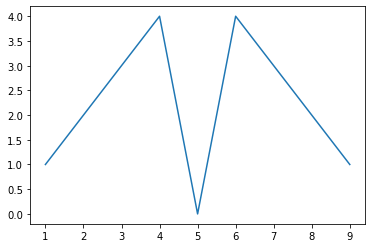

In [5]:
x = range(1, 10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y) # using plt package to plot line graph

In [8]:
type(x)

range

In [11]:
mpg = cars['mpg']

<AxesSubplot:>

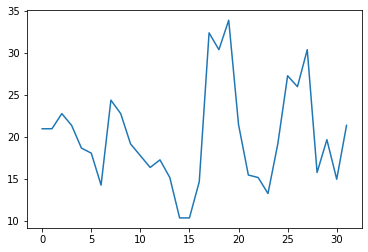

In [12]:
mpg.plot()

<AxesSubplot:>

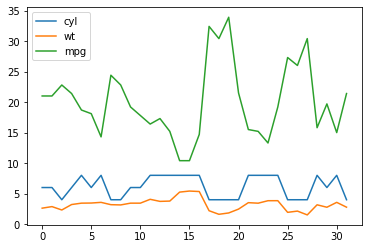

In [13]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

<BarContainer object of 9 artists>

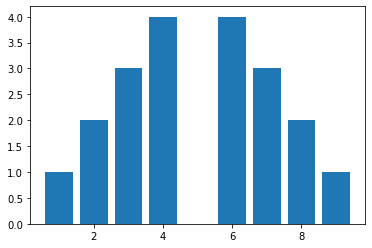

In [14]:
plt.bar(x,y)

<AxesSubplot:>

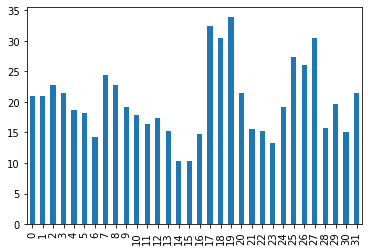

In [26]:
mpg.plot(kind = 'bar') # not using plt package

<AxesSubplot:>

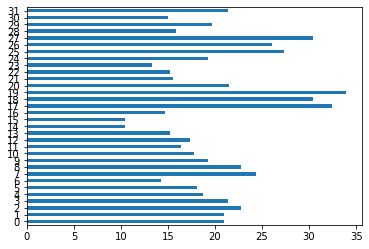

In [18]:
mpg.plot(kind = 'barh')

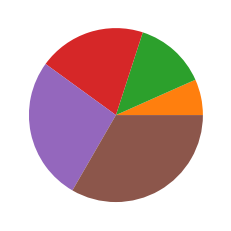

In [27]:
x = [0,1,2,3,4,5]
plt.pie(x)
plt.show()

### Saving a plot

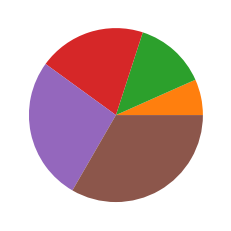

In [20]:
plt.pie(x)
plt.savefig('pie_chart.png')
plt.show()

In [28]:
x.plot(kind = 'pie')

AttributeError: 'list' object has no attribute 'plot'

In [21]:
%pwd

'C:\\Users\\10535\\Business Anlytics II'

### Object-oriented plotting

In [29]:
# Adding elements to a plot is an essestial part of oo ploting
# steps: Generate a figure objrct -> add axes to the figiure
# generates plots within th figure -> specify plotting and layout parameters

# Subplots: a plotting figure contains more than one plot

In [31]:
%matplotlib inline

In [34]:
rcParams['figure.figsize'] = 5,4

In [ ]:
fig = plt.figure()
ax = fig.add_axes([])
ax.plot(...data here)

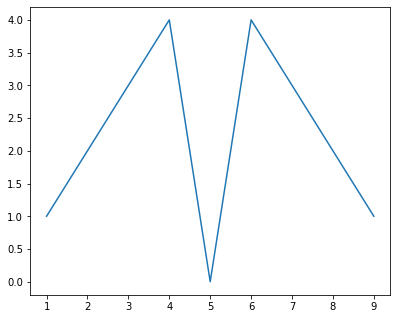

In [42]:
x = range(1, 10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.plot(x,y)

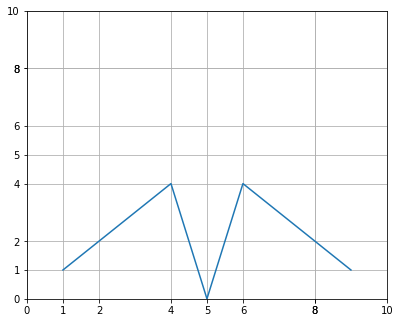

In [43]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,10])
ax.set_yticks([0,1,2,4,5,6,8,10])

ax.grid()
ax.plot(x,y)

### Generating multiple plots in one figure with subplots

<Figure size 360x288 with 0 Axes>

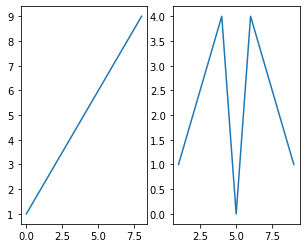

In [46]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2) # create 2 axes here

ax1.plot(x) 
ax2.plot(x,y)

### Define the plot color

<BarContainer object of 9 artists>

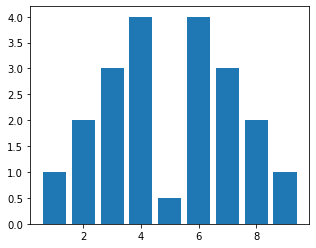

In [47]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]
plt.bar(x,y)

<BarContainer object of 32 artists>

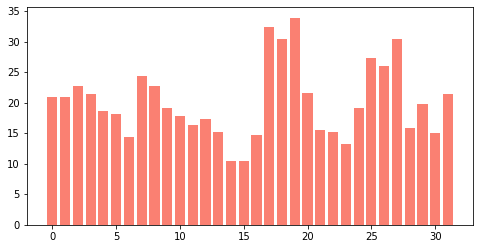

In [101]:
wide = [.5,.5,.5,.9,.9,.9,.5,.5,.5]
mpg = cars.mpg
x = cars.index
color = ['salmon']
plt.bar(x,mpg, color = color, align = 'center')

<AxesSubplot:>

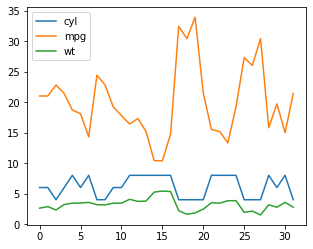

In [49]:
df = cars[['cyl', 'mpg', 'wt']]
df.plot()

<AxesSubplot:>

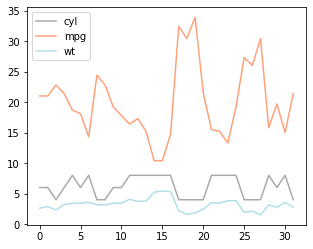

In [50]:
color_theme = ['darkgrey', 'lightsalmon', 'powderblue']
df.plot(color = color_theme)

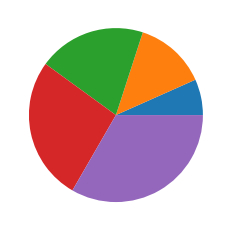

In [51]:
z = [1,2,3,4,5]
plt.pie(z)
plt.show()

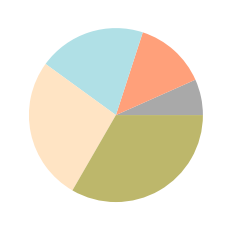

In [54]:
color_set = ['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4', '#BDB76B']
plt.pie(z, colors=color_set)
plt.show()

### Customizing line styles

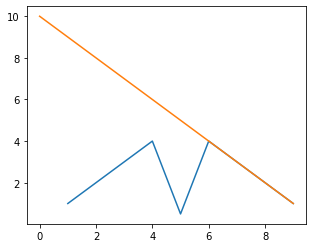

In [55]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]

plt.plot(x, y)
plt.plot(x1, y1)

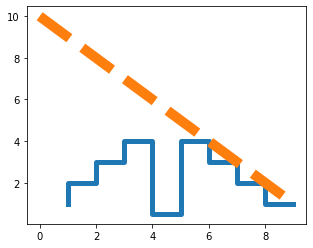

In [56]:
plt.plot(x, y, ds = 'steps', lw = 5) # ds - drawing style
plt.plot(x1, y1, ls = '--', lw = 10) # ls - linestyle

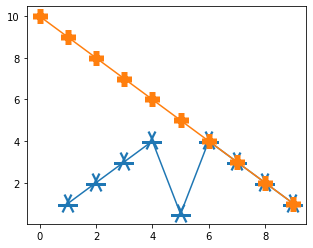

In [58]:
plt.plot(x, y, marker = '1', mew = 20) 
plt.plot(x1, y1, marker = '+', mew = 15)

In [59]:
rcParams['figure.figsize'] = 8, 4

### Label the plots


#### functoinal method

Text(0, 0.5, 'your y-axis label')

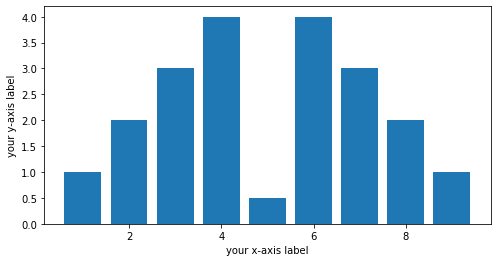

In [61]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]

plt.bar(x,y)
plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

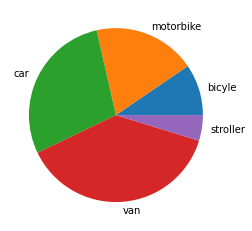

In [62]:
z = [1,2,3,4,.5]
veh_type = ['bicyle', 'motorbike', 'car', 'van', 'stroller']

plt.pie(z, labels = veh_type)
plt.show()

#### Object Oriented method

In [78]:
len(mpg)

32

Text(0, 0.5, 'miles/gal')

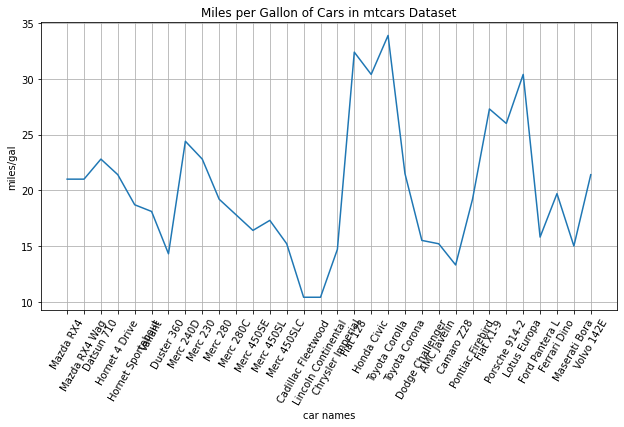

In [87]:
mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(mpg) #? how's this one becomes the obejct we perform modifications?
ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.grid()

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

### Legend in the plot

#### The funcitonal method

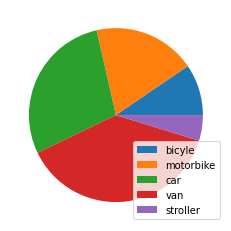

In [73]:
plt.pie(z)
plt.legend(veh_type, loc = 'best')
plt.show()  

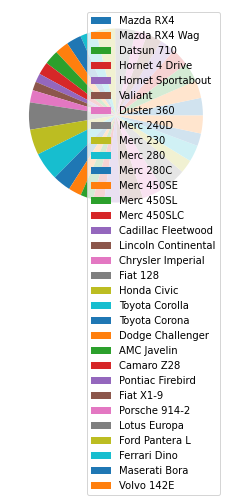

In [75]:
plt.pie(mpg)
plt.legend(cars.car_names, loc = 'best')
plt.show()

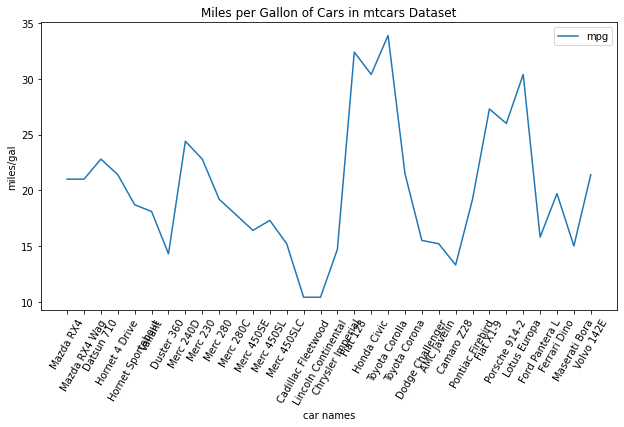

In [80]:
# oo method
mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot() #? how's this one becomes the obejct we perform modifications?
ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc = 'best')

 ### Annotating your plot

In [81]:
mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

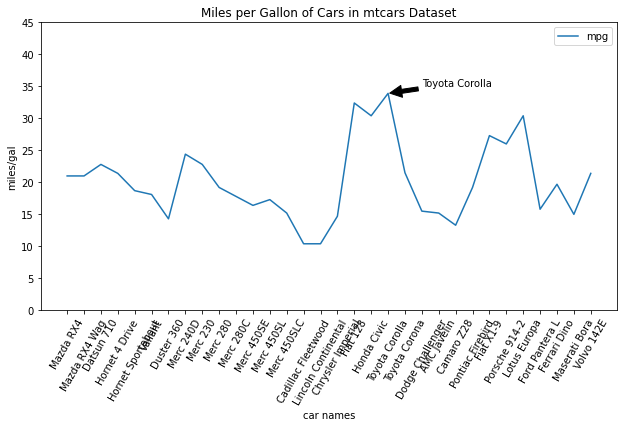

In [86]:
mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot() #? how's this one becomes the obejct we perform modifications?
ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation = 60, fontsize = 'medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

ax.legend(loc = 'best')

ax.set_ylim([0, 45])
ax.annotate('Toyota Corolla', xy = (19, 33.9), xytext = (21, 35),
           arrowprops = dict(facecolor = 'black', shrink = 0.05))

## The simplest time series plot

In [105]:
address_1 = 'C:/Users/10535/Ex_Files_Python_Data_Science_EssT_Pt_1/Data/Superstore-Sales.csv'
df = pd.read_csv(address_1, index_col = 'Order Date', encoding =  'cp1252', parse_dates = True)
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<AxesSubplot:xlabel='Order Date'>

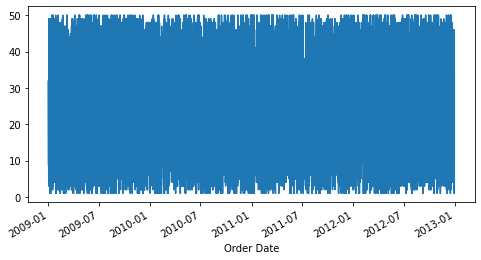

In [106]:
df['Order Quantity'].plot()

<AxesSubplot:title={'center':'Superstore Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

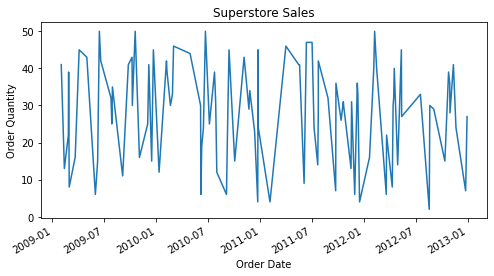

In [108]:
df2 =  df.sample(n = 100, random_state = 25, axis = 0)

plt.xlabel('Order Date')

plt.ylabel('Order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

In [110]:
import seaborn as sb
sb.set_style('whitegrid')

<AxesSubplot:ylabel='Frequency'>

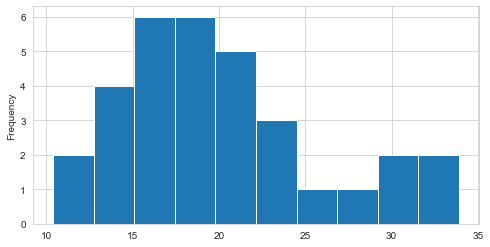

In [111]:
mpg = cars.mpg
mpg.plot(kind = 'hist')

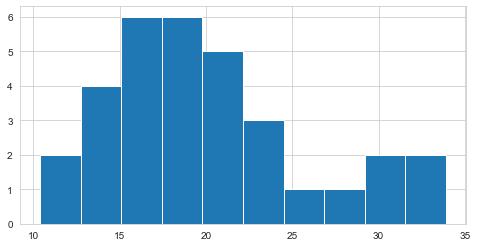

In [112]:
plt.hist(mpg)
plt.show()

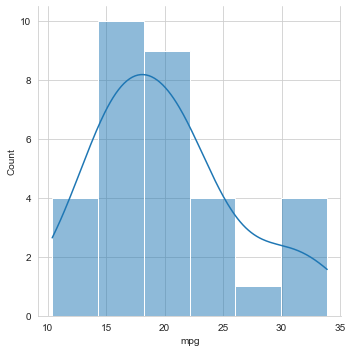

In [118]:
sb.displot(mpg, kde = True)

### Seeing  Scatterplots in action

<AxesSubplot:xlabel='hp', ylabel='mpg'>

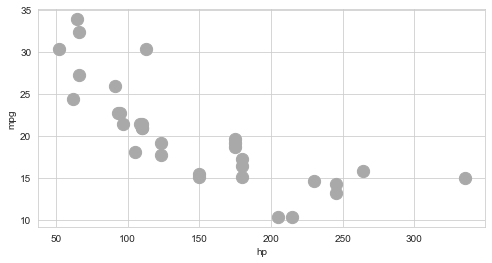

In [114]:
cars.plot(kind = 'scatter', x = 'hp', y = 'mpg', c = ['darkgrey'], s = 150)

<AxesSubplot:xlabel='hp', ylabel='mpg'>

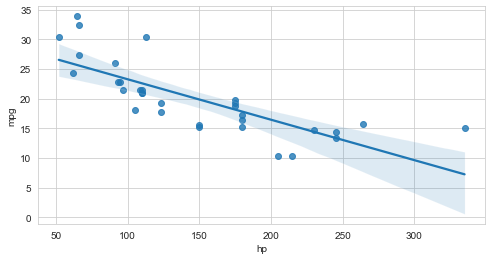

In [115]:
sb.regplot(x = 'hp', y = 'mpg', data = cars, scatter = True)

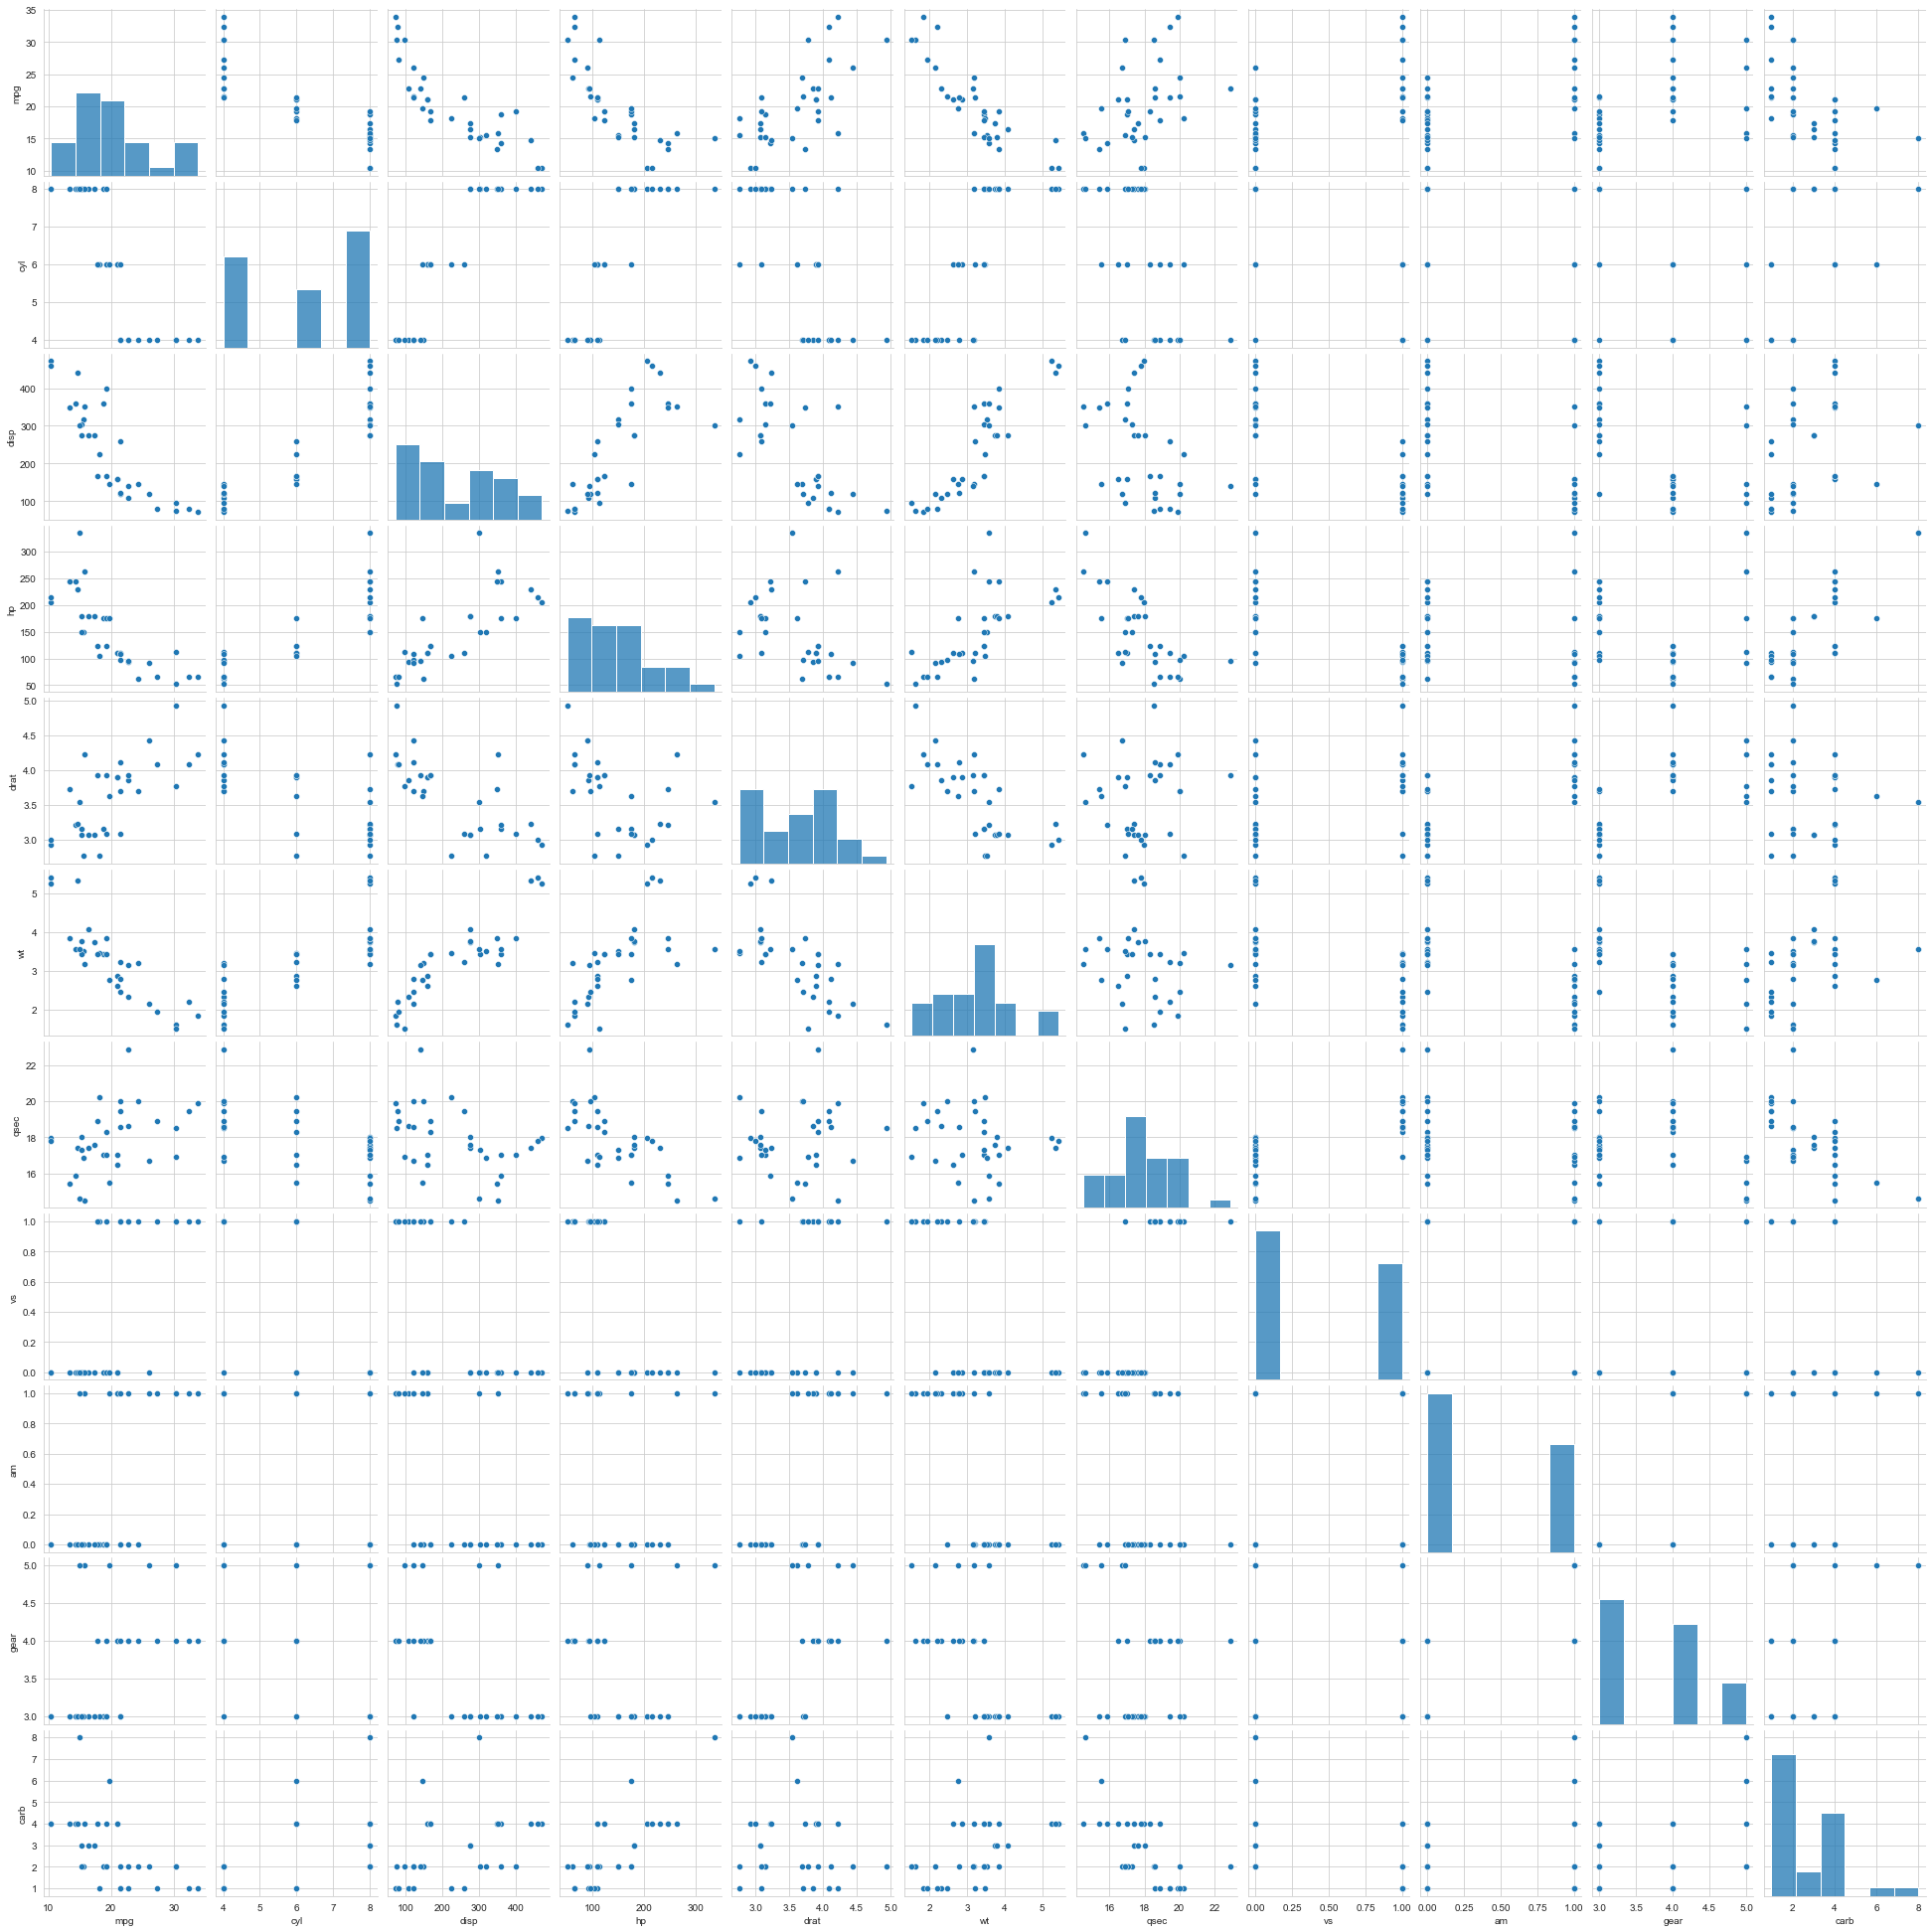

In [117]:
sb.pairplot(cars)

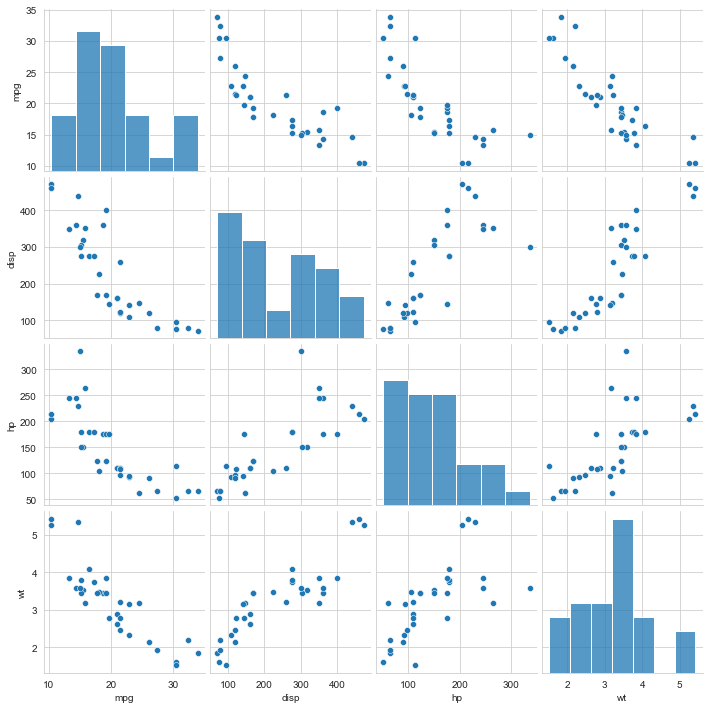

In [119]:
cars_subset =  cars [['mpg', 'disp', 'hp', 'wt']]
sb.pairplot(cars_subset)
plt.show()

### Building boxplots

<AxesSubplot:title={'center':'wt'}, xlabel='am'>

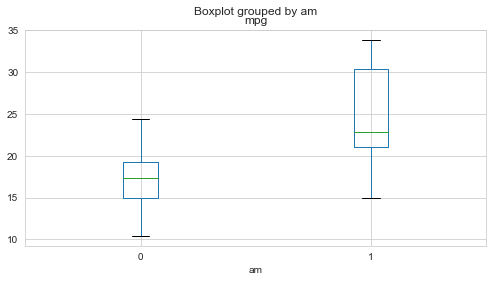

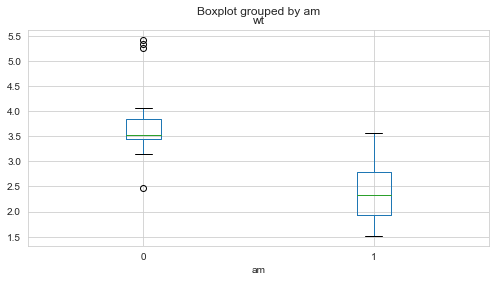

In [120]:
cars.boxplot(column = 'mpg', by = 'am')
cars.boxplot(column = 'wt', by = 'am')

<AxesSubplot:xlabel='am', ylabel='mpg'>

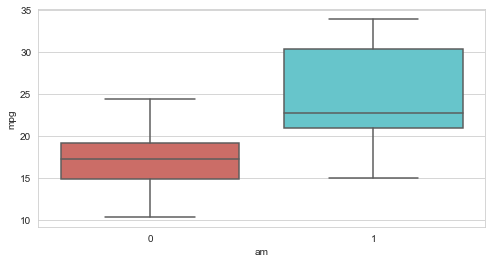

In [121]:
sb.boxplot(x='am', y = 'mpg', data = cars, palette = 'hls')